# Treating Skin Disease Identification as a simple 3 classes classification Task
## Choose classes.
We have choosen 3 classes with equal amount of images = 151 hence there is no class imbalance.

## Results

### Without Image augmentation
The model heavily overfitted, possible reasons are not enough data as it was working fine on binary classifcation with val-accuracy remaining under 50%

### With Image Augmentation.
The model improved substantially with val-accuracy reaching 70% with few parameter changes But still not enougb with an accuracy of 95%

### After Hyperparamter optimization and adjusting epochs 
The model improved slightly with the accuracy reaching 98% with validation accuracy reaching 77%, still model being quite overfitted.

## Further Steps
- Try this on binary segmented data images using a pre-trained model of segment anything
- Try this with Otus's segmentation
- Improve the architecture of the model this is a very prelimnary architecture.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

dataset_path = ""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        dataset_path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/fitzpatrick
/kaggle/input/fitzpatrick/CategorizedFitz
/kaggle/input/fitzpatrick/CategorizedFitz/pityriasis rubra pilaris
/kaggle/input/fitzpatrick/CategorizedFitz/neutrophilic dermatoses
/kaggle/input/fitzpatrick/CategorizedFitz/nevocytic nevus
/kaggle/input/fitzpatrick/CategorizedFitz/dermatomyositis
/kaggle/input/fitzpatrick/CategorizedFitz/factitial dermatitis
/kaggle/input/fitzpatrick/CategorizedFitz/malignant melanoma
/kaggle/input/fitzpatrick/CategorizedFitz/granuloma annulare
/kaggle/input/fitzpatrick/CategorizedFitz/stevens johnson syndrome
/kaggle/input/fitzpatrick/CategorizedFitz/langerhans cell histiocytosis
/kaggle/input/fitzpatrick/CategorizedFitz/lupus subacute
/kaggle/input/fitzpatrick/CategorizedFitz/nevus sebaceous of jadassohn
/kaggle/input/fitzpatrick/CategorizedFitz/hidradenitis
/kaggle/input/fitzpatrick/CategorizedFitz/urticaria pigmentosa
/kaggle/input/fitzpatrick/CategorizedFitz/acne vulgaris
/kaggle/input/fitzpatrick/CategorizedFitz/n

In [2]:
files_list = glob.glob("/kaggle/input/fitzpatrick/*")
files_list

['/kaggle/input/fitzpatrick/fitzPatrickCategorizer.py',
 '/kaggle/input/fitzpatrick/fitzpatrick_cleaned_annoted_data.xlsx',
 '/kaggle/input/fitzpatrick/fitzPatrickDownloader.py',
 '/kaggle/input/fitzpatrick/CategorizedFitz',
 '/kaggle/input/fitzpatrick/image.csv',
 '/kaggle/input/fitzpatrick/fitzpatrick17k.csv']

In [3]:
images = glob.glob('/kaggle/input/fitzpatrick/*/')[0]
images

'/kaggle/input/fitzpatrick/CategorizedFitz/'

In [4]:
label_151 = ['pediculosis lids', 'dermatomyositis', 'urticaria']


In [5]:
#Entirely used to make_directory of working classes
working_path = "/kaggle/working/working_classes"
import shutil
if not(os.path.exists(working_path)):
    os.mkdir(working_path)
for label in label_151:
    new_dir = working_path + "/" + label
    shutil.copytree(images + "/" + label, new_dir)
    
workings = glob.glob(working_path + "/*/")

In [6]:
workings

['/kaggle/working/working_classes/urticaria/',
 '/kaggle/working/working_classes/pediculosis lids/',
 '/kaggle/working/working_classes/dermatomyositis/']

In [7]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/66c29e61739db4535bf5e8f472ea346a.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/9f2521a07b5f8acca19872f2b5e7d842.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/ee1ac3800fde220846555bf3c6dfbc47.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/10134f12af27189d52398d32278d5848.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/fc1780e365feca275ecee17614814ab8.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/bd70fbb7442412ce54b1420b61bbfc07.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/31db72d42e3f8d037635d20c1b9ffdd3.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/7d28bd55747a91f1766a0a708e97599a.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/c76e443d3f69d02f25983903b64dfc83.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/5aa5b93b939e9bad217b6dfbd1e76dd0.jpg', '/kaggle/

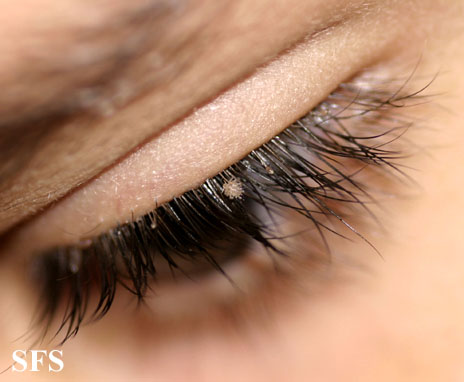

In [8]:
urticaria = glob.glob(images + label_151[0] + "/*")
print(urticaria)
PIL.Image.open(urticaria[1])

In [9]:
batch_size = 32
img_height = 256
img_width = 256

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 453 files belonging to 3 classes.
Using 363 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 453 files belonging to 3 classes.
Using 90 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['dermatomyositis', 'pediculosis lids', 'urticaria']


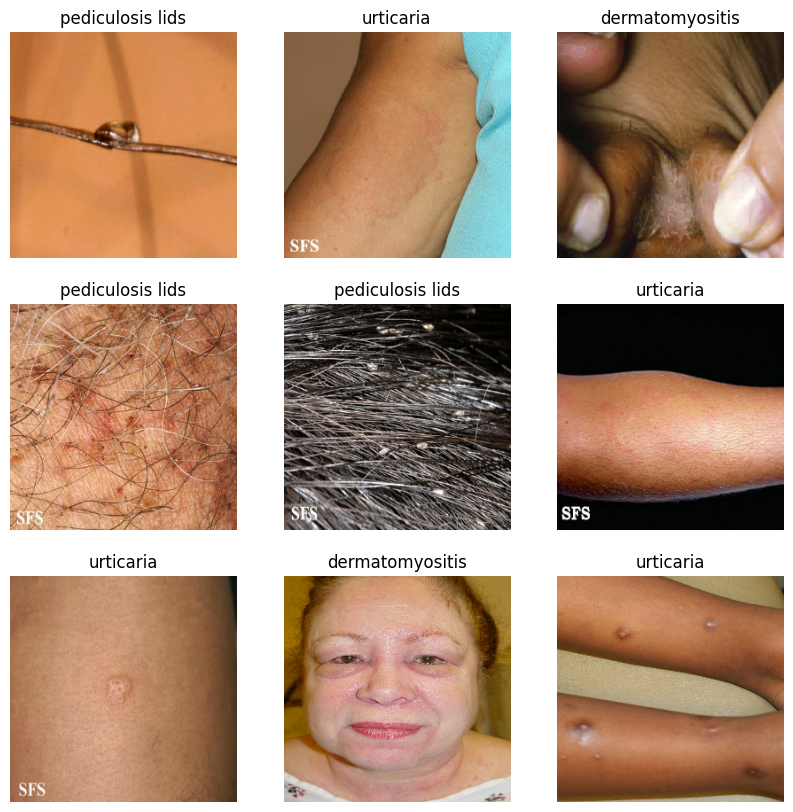

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
#The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [29]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [30]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [31]:
#Just for performance, so dataset doesn't become bottleneck, mostly not needed here
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
data_augmentation_horizontal = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),

  ]
)

data_augmentation_vertical = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("vertical", input_shape= (img_height, img_width, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

In [33]:
num_classes = 3

model = tf.keras.Sequential([
  data_augmentation_horizontal,
    data_augmentation_vertical,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes,activation="softmax", kernel_regularizer= "l2")
])

In [34]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                   

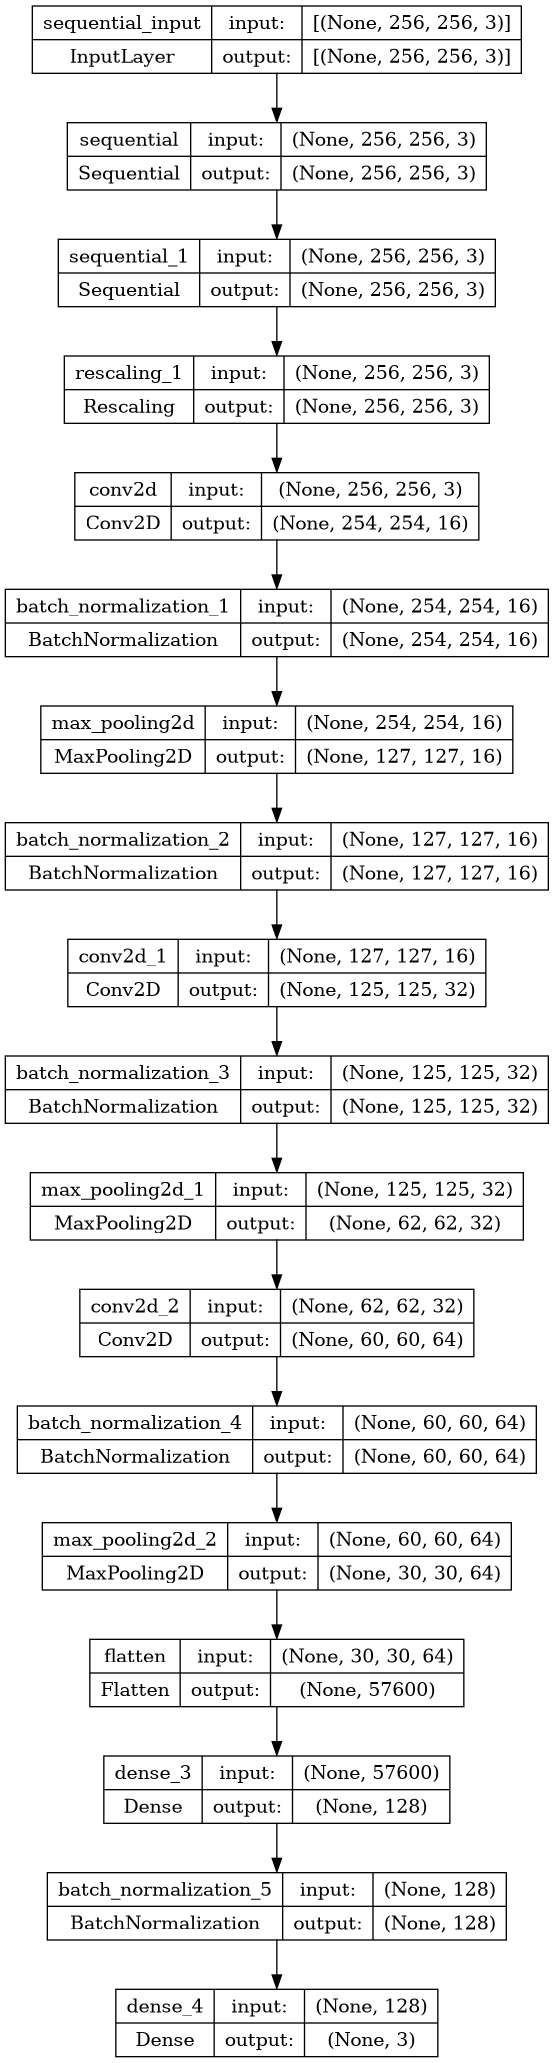

In [35]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [89]:
# Implement callbacks like EarlyStopping and potentially LearningRateScheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

In [90]:
history  = model.fit(
  train_ds,
  validation_data=val_ds,
  
  epochs=60,
     
)

Epoch 1/60
12/12 [==============================] - 5s 60ms/step - loss: 1.4007 - accuracy: 0.6694 - val_loss: 1.1930 - val_accuracy: 0.3222
Epoch 2/60
12/12 [==============================] - 0s 42ms/step - loss: 0.7904 - accuracy: 0.7493 - val_loss: 1.2345 - val_accuracy: 0.4444
Epoch 3/60
12/12 [==============================] - 1s 42ms/step - loss: 0.5920 - accuracy: 0.7961 - val_loss: 1.1688 - val_accuracy: 0.4889
Epoch 4/60
12/12 [==============================] - 1s 42ms/step - loss: 0.5074 - accuracy: 0.8264 - val_loss: 1.1850 - val_accuracy: 0.4222
Epoch 5/60
12/12 [==============================] - 1s 42ms/step - loss: 0.4772 - accuracy: 0.8512 - val_loss: 1.2610 - val_accuracy: 0.4000
Epoch 6/60
12/12 [==============================] - 1s 42ms/step - loss: 0.4069 - accuracy: 0.8623 - val_loss: 1.3587 - val_accuracy: 0.4000
Epoch 7/60
12/12 [==============================] - 0s 42ms/step - loss: 0.3867 - accuracy: 0.8788 - val_loss: 1.5921 - val_accuracy: 0.4000
Epoch 8/60
12

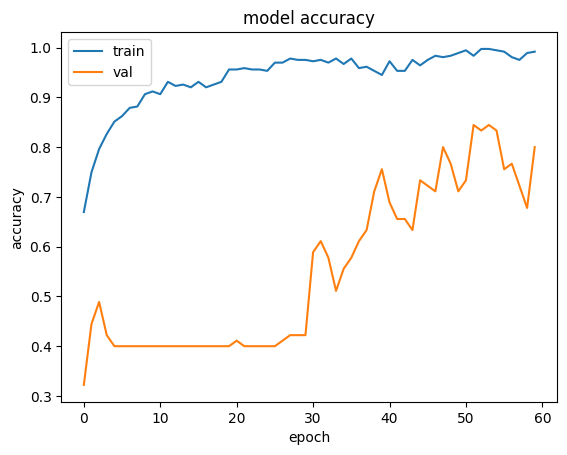

In [91]:
z

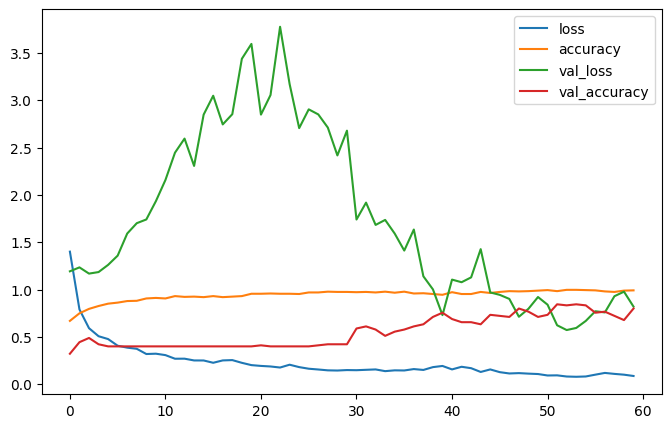

In [92]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
os.mkdir("/kaggle/working/experiment_01_image_augmentation_tf_image_classification")


In [ ]:
plt.savefig("/kaggle/working/experiment_01_image_augmentation_tf_image_classification/metrics_chart.png")

In [18]:
def preprocess_image(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    return resized_image, label

train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)


In [81]:
import tensorflow as tf
from transformers import ViTFeatureExtractor, TFAutoModelForImageClassification

num_classes = 3
image_size = 224  # Standard image size for Vision Transformer

# Initialize the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# Load the Vision Transformer model pre-trained on ImageNet-21k
# We will fine-tune this model on your specific dataset
model = TFAutoModelForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_classes,  # Number of output classes
    id2label={str(i): f'label_{i}' for i in range(num_classes)},  # Optional: Mapping for id to label
    label2id={f'label_{i}': str(i) for i in range(num_classes)},  # Optional: Mapping for label to id
)

# Compile the model with optimizer, loss, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Model summary to see the full architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTor

Model: "tf_vi_t_for_image_classification_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit (TFViTMainLayer)        multiple                  85798656  
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 85800963 (327.30 MB)
Trainable params: 85800963 (327.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
  EarlyStopping(monitor='val_loss', patience=10),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)  # Save the best model based on `val_loss`
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=60,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/60


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 1640, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filel4723u_f.py", line 37, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "/tmp/__autograph_generated_file5pn02y8s.py", line 17, in tf__call
        outputs = ag__.converted_call(ag__.ld(self).vit, (), dict(pixel_values=ag__.ld(pixel_values), head_mask=ag__.ld(head_mask), output_attentions=ag__.ld(output_attentions), output_hidden_states=ag__.ld(output_hidden_states), interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), return_dict=ag__.ld(return_dict), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_filel4723u_f.py", line 37, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "/tmp/__autograph_generated_fileg8thx7ed.py", line 24, in tf__call
        embedding_output = ag__.converted_call(ag__.ld(self).embeddings, (), dict(pixel_values=ag__.ld(pixel_values), interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_filemhhyd63p.py", line 12, in tf__call
        embeddings = ag__.converted_call(ag__.ld(self).patch_embeddings, (ag__.ld(pixel_values),), dict(interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
    File "/tmp/__autograph_generated_filex47nue_0.py", line 63, in tf__call
        projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)

    ValueError: Exception encountered when calling layer 'tf_vi_t_for_image_classification_3' (type TFViTForImageClassification).
    
    in user code:
    
        File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 735, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 744, in call  *
            outputs = self.vit(
        File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/tmp/__autograph_generated_filel4723u_f.py", line 37, in tf__run_call_with_unpacked_inputs
            retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
        File "/tmp/__autograph_generated_fileg8thx7ed.py", line 24, in tf__call
            embedding_output = ag__.converted_call(ag__.ld(self).embeddings, (), dict(pixel_values=ag__.ld(pixel_values), interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
        File "/tmp/__autograph_generated_filemhhyd63p.py", line 12, in tf__call
            embeddings = ag__.converted_call(ag__.ld(self).patch_embeddings, (ag__.ld(pixel_values),), dict(interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
        File "/tmp/__autograph_generated_filex47nue_0.py", line 63, in tf__call
            projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)
    
        ValueError: Exception encountered when calling layer 'vit' (type TFViTMainLayer).
        
        in user code:
        
            File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_tf_utils.py", line 735, in run_call_with_unpacked_inputs  *
                return func(self, **unpacked_inputs)
            File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 503, in call  *
                embedding_output = self.embeddings(
            File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "/tmp/__autograph_generated_filemhhyd63p.py", line 12, in tf__call
                embeddings = ag__.converted_call(ag__.ld(self).patch_embeddings, (ag__.ld(pixel_values),), dict(interpolate_pos_encoding=ag__.ld(interpolate_pos_encoding), training=ag__.ld(training)), fscope)
            File "/tmp/__autograph_generated_filex47nue_0.py", line 63, in tf__call
                projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)
        
            ValueError: Exception encountered when calling layer 'embeddings' (type TFViTEmbeddings).
            
            in user code:
            
                File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 124, in call  *
                    embeddings = self.patch_embeddings(
                File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                    raise e.with_traceback(filtered_tb) from None
                File "/tmp/__autograph_generated_filex47nue_0.py", line 63, in tf__call
                    projection = ag__.converted_call(ag__.ld(self).projection, (ag__.ld(pixel_values),), None, fscope)
            
                ValueError: Exception encountered when calling layer 'patch_embeddings' (type TFViTPatchEmbeddings).
                
                in user code:
                
                    File "/opt/conda/lib/python3.10/site-packages/transformers/models/vit/modeling_tf_vit.py", line 199, in call  *
                        projection = self.projection(pixel_values)
                    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                        raise e.with_traceback(filtered_tb) from None
                    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
                        raise ValueError(
                
                    ValueError: Input 0 of layer "projection" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 224, 3, 224)
                
                
                Call arguments received by layer 'patch_embeddings' (type TFViTPatchEmbeddings):
                  • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
                  • interpolate_pos_encoding=None
                  • training=True
            
            
            Call arguments received by layer 'embeddings' (type TFViTEmbeddings):
              • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
              • interpolate_pos_encoding=None
              • training=True
        
        
        Call arguments received by layer 'vit' (type TFViTMainLayer):
          • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
          • head_mask=None
          • output_attentions=False
          • output_hidden_states=False
          • interpolate_pos_encoding=None
          • return_dict=True
          • training=True
    
    
    Call arguments received by layer 'tf_vi_t_for_image_classification_3' (type TFViTForImageClassification):
      • pixel_values=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
      • head_mask=None
      • output_attentions=None
      • output_hidden_states=None
      • interpolate_pos_encoding=None
      • return_dict=None
      • labels=None
      • training=True


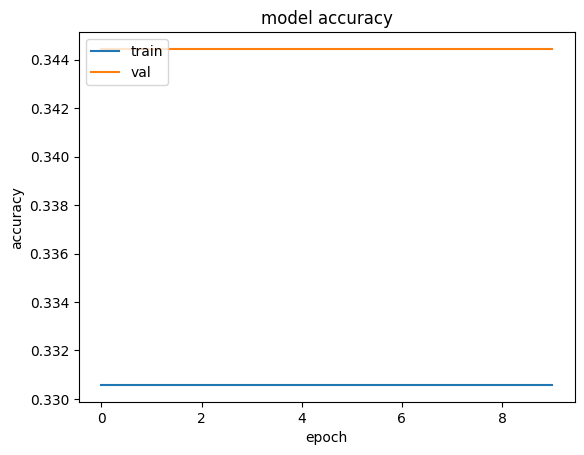

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
for images, labels in train_ds.take(1):
    print(images.shape)  # Expecting something like (batch_size, 224, 224, 3)


(32, 224, 224, 3)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers

def create_vit_classifier(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim):
    inputs = layers.Input(shape=input_shape)
    # Create patches
    patches = Patches(patch_size)(inputs)
    
    # Encode patches to a latent space
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x3)
        x5 = layers.Dense(embedding_dim)(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    # Create a [batch_size, embedding_dim] tensor
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Classify outputs
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    # Create the Keras model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Model configuration
input_shape = (224, 224, 3)  # Input image size
num_classes = 5  # Example number of classes
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)
num_transformer_blocks = 4  # Number of transformer blocks
embedding_dim = 64  # Dimensionality of the patch encoding and transformer internal embedding
num_heads = 4  # Number of attention heads
mlp_dim = 128  # Dimensionality of the dense layers of the transformer

# Create the ViT model
vit_model = create_vit_classifier(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)

# Compile the model
vit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
vit_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 patches_1 (Patches)         (None, None, 768)            0         ['input_2[0][0]']             
                                                                                                  
 patch_encoder_1 (PatchEnco  (None, 196, 64)              61760     ['patches_1[0][0]']           
 der)                                                                                             
                                                                                                  
 layer_normalization_9 (Lay  (None, 196, 64)              128       ['patch_encoder_1[0][0]'

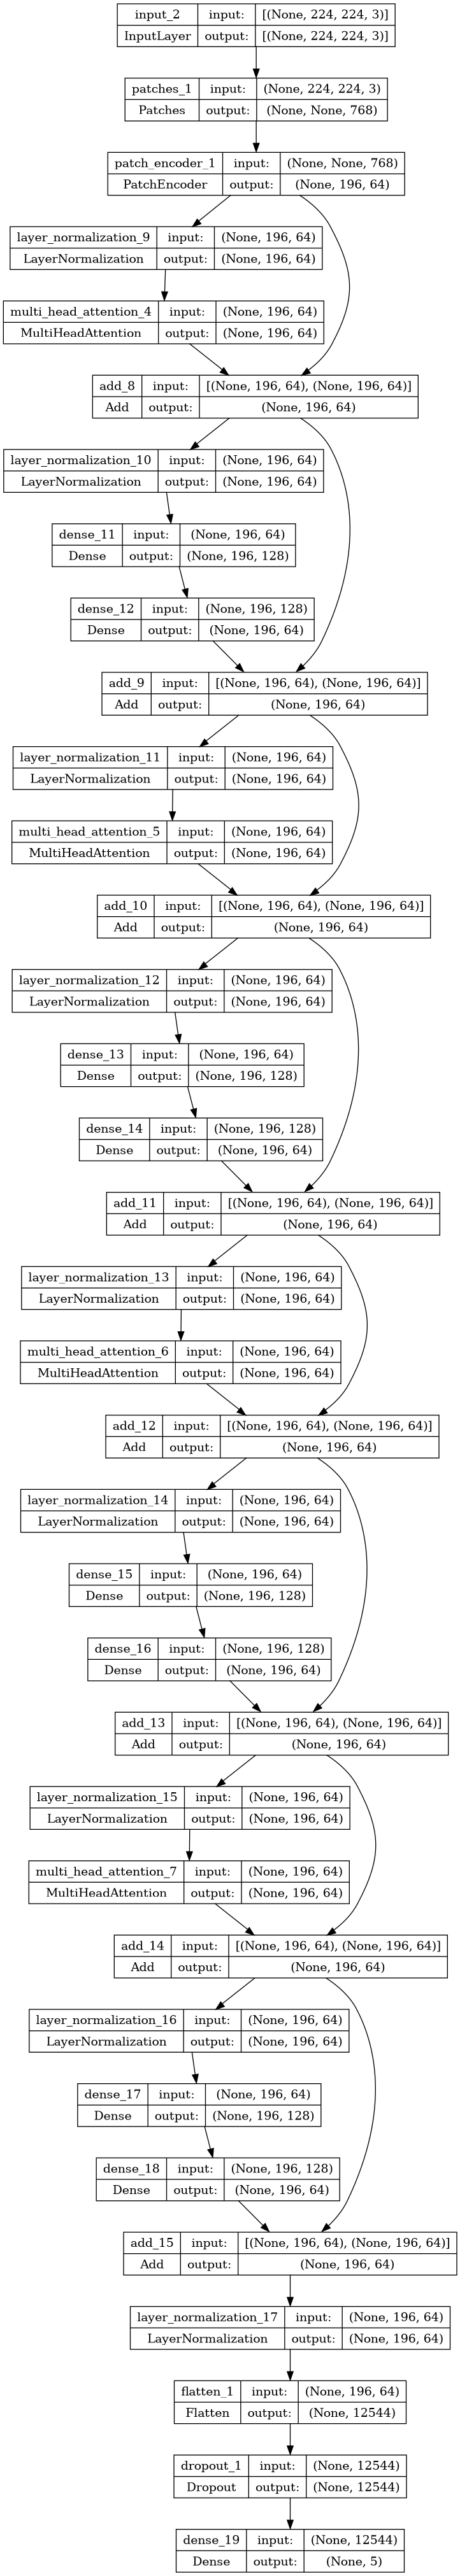

In [6]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(vit_model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [84]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
  EarlyStopping(monitor='val_loss', patience=50),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)  # Save the best model based on `val_loss`
]

history = vit_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/100
12/12 [==============================] - 15s 128ms/step - loss: 3.9764 - accuracy: 0.3140 - val_loss: 2.4720 - val_accuracy: 0.3444
Epoch 2/100
12/12 [==============================] - 1s 65ms/step - loss: 2.3304 - accuracy: 0.3278 - val_loss: 2.0510 - val_accuracy: 0.4000
Epoch 3/100
12/12 [==============================] - 1s 64ms/step - loss: 2.0395 - accuracy: 0.3113 - val_loss: 1.5942 - val_accuracy: 0.3444
Epoch 4/100
12/12 [==============================] - 1s 62ms/step - loss: 1.8121 - accuracy: 0.3306 - val_loss: 1.1757 - val_accuracy: 0.4000
Epoch 5/100
12/12 [==============================] - 1s 51ms/step - loss: 1.7898 - accuracy: 0.3333 - val_loss: 1.7535 - val_accuracy: 0.2556
Epoch 6/100
12/12 [==============================] - 1s 64ms/step - loss: 1.8079 - accuracy: 0.3278 - val_loss: 1.1175 - val_accuracy: 0.3444
Epoch 7/100
12/12 [==============================] - 1s 48ms/step - loss: 1.7260 - accuracy: 0.3196 - val_loss: 1.1611 - val_accuracy: 0.2556
Epoc

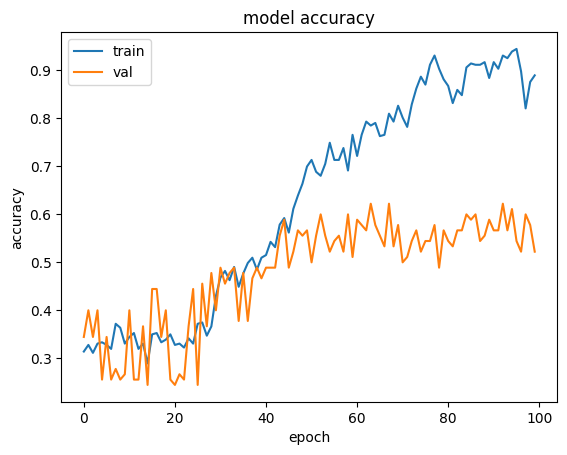

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from transformers import TFAutoModel


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def create_cnn_model(fine_tune_at=100):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    model = tf.keras.Model(inputs, x)
    return model


In [5]:
class CombinedCNNModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(CombinedCNNModel, self).__init__()
        self.cnn = create_cnn_model()
        self.dense1 = tf.keras.layers.Dense(1024, activation='relu')  # Example of an additional dense layer
        self.dropout = tf.keras.layers.Dropout(0.5)  # Dropout layer to reduce overfitting
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.cnn(inputs)
        x = self.dense1(x)
        x = self.dropout(x)
        return self.classifier(x)


In [6]:
num_classes = 5  # For example, using CIFAR-10 dataset
model = CombinedCNNModel(num_classes=num_classes)

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 [==============================] - 3s 0us/step


In [7]:
model.build((None, 224, 224, 3))  # None allows for a variable batch size
model.summary()


Model: "combined_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1024)              25694080  
                                                                 
 dense_1 (Dense)             multiple                  1049600   
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  5125      
                                                                 
Total params: 26748805 (102.04 MB)
Trainable params: 22609925 (86.25 MB)
Non-trainable params: 4138880 (15.79 MB)
_________________________________________________________________


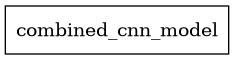

In [8]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(model, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [9]:
history  = model.fit(
  train_ds,
  validation_data=val_ds,
  
  epochs=100,
     
)

NameError: name 'train_ds' is not defined

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, regularization_factor=0.01):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim, 
                                       kernel_regularizer=l2(regularization_factor))
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        batch_size = tf.shape(patch)[0]
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        positions = self.position_embedding(positions)

        # Expand dims to [1, num_patches, projection_dim] and tile to match batch size
        positions = tf.expand_dims(positions, axis=0)
        positions = tf.tile(positions, [batch_size, 1, 1])

        encoded = self.projection(patch) + positions
        return encoded

def create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim):
    inputs = layers.Input(shape=input_shape)
    
    # Convolutional preprocessing
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding="same", activation="relu", 
                  kernel_regularizer=l2(0.01))(inputs)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="relu", 
                      kernel_regularizer=l2(0.01))(x)


    # Create patches from the output of the CNN
    patches = Patches(patch_size)(x)
    
    # Adjust the number of patches based on the new size after convolutional layers
    size_after_conv = input_shape[0] // 4  # Adjust based on your convolutional layers
    num_patches = (size_after_conv // patch_size) * (size_after_conv // patch_size)
    encoded_patches = PatchEncoder(num_patches, embedding_dim)(patches)
    
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x4 = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x3)
        x5 = layers.Dense(embedding_dim)(x4)
        encoded_patches = layers.Add()([x5, x2])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

# Model configuration
input_shape = (224, 224, 3)
num_classes = 5
patch_size = 16
num_transformer_blocks = 4
embedding_dim = 64
num_heads = 4
mlp_dim = 128

# Create the ViT model with convolutional layers
vit_model_with_cnn = create_vit_classifier_with_cnn(input_shape, num_classes, patch_size, num_transformer_blocks, embedding_dim, num_heads, mlp_dim)

# Compile the model
vit_model_with_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
vit_model_with_cnn.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 112, 112, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 56, 56, 128)          73856     ['conv2d_6[0][0]']            
                                                                                                  
 patches_4 (Patches)         (None, None, 32768)          0         ['conv2d_7[0][0]']            
                                                                                            

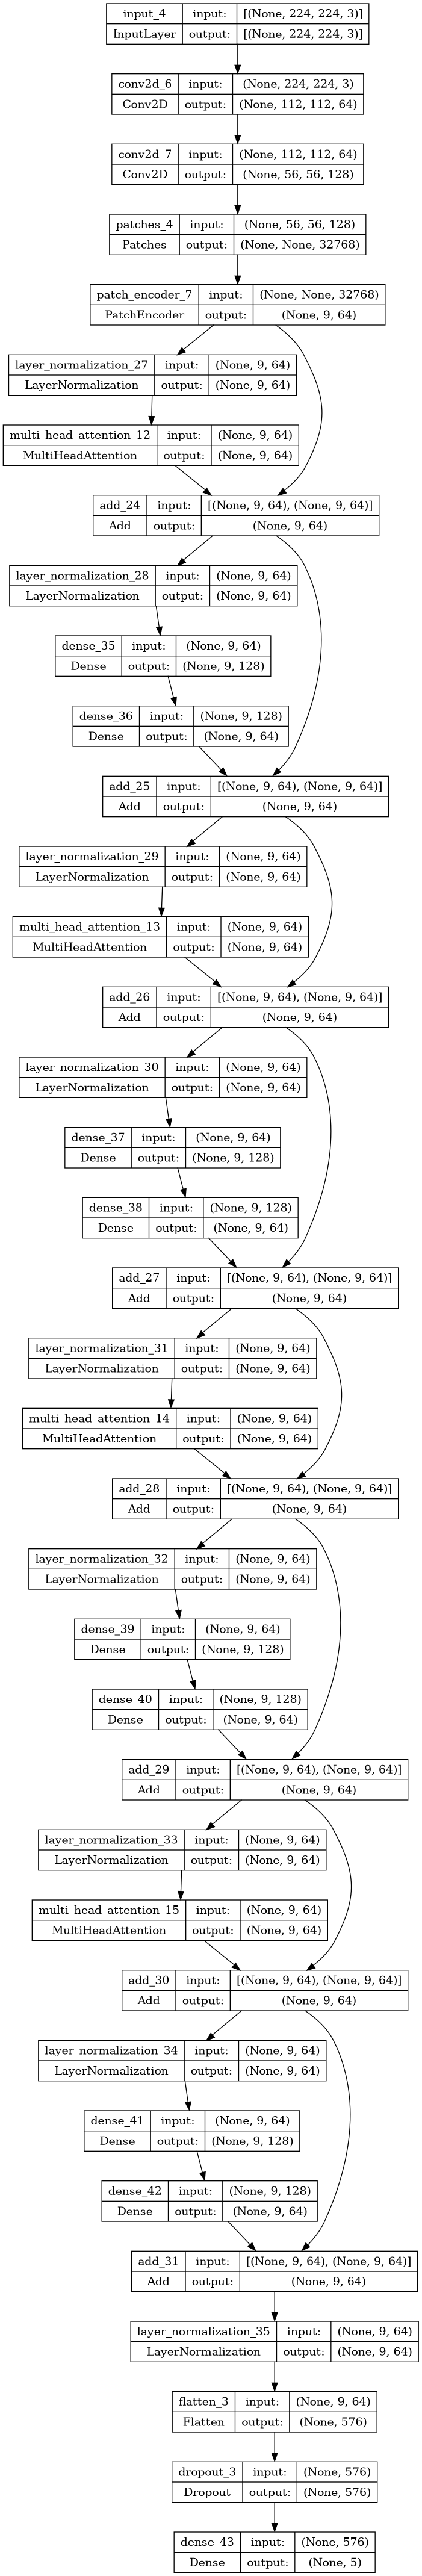

In [41]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(vit_model_with_cnn, to_file='/kaggle/working/model_diagram.png', show_shapes=True, show_layer_names=True)


In [42]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [43]:
log_dir = './logs'


In [44]:
# tensorboard_callback = tf.keras.callbacks.


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

callbacks = [
  EarlyStopping(monitor='val_loss', patience=50),  # Stop training when `val_loss` is no longer improving
  ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True),  # Save the best model based on `val_loss`
#     TensorBoard(log_dir=log_dir, histogram_freq=1),

]

history = vit_model_with_cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  verbose=1,
  callbacks=callbacks,
    batch_size= 32,
)


Epoch 1/100
12/12 [==============================] - 2s 106ms/step - loss: 0.6043 - accuracy: 0.8953 - val_loss: 1.1626 - val_accuracy: 0.6778
Epoch 2/100
12/12 [==============================] - 2s 107ms/step - loss: 0.5769 - accuracy: 0.8843 - val_loss: 1.1433 - val_accuracy: 0.6889
Epoch 3/100
12/12 [==============================] - 2s 86ms/step - loss: 0.6473 - accuracy: 0.8678 - val_loss: 1.2330 - val_accuracy: 0.6778
Epoch 4/100
12/12 [==============================] - 2s 107ms/step - loss: 0.5649 - accuracy: 0.9146 - val_loss: 1.0576 - val_accuracy: 0.6556
Epoch 5/100
12/12 [==============================] - 2s 93ms/step - loss: 0.4863 - accuracy: 0.9394 - val_loss: 1.0881 - val_accuracy: 0.7333
Epoch 6/100
12/12 [==============================] - 2s 85ms/step - loss: 0.4858 - accuracy: 0.9311 - val_loss: 1.1578 - val_accuracy: 0.6222
Epoch 7/100
12/12 [==============================] - 2s 87ms/step - loss: 0.5150 - accuracy: 0.9311 - val_loss: 1.4456 - val_accuracy: 0.6222
Epo

In [49]:
# Serialize the model architecture to JSON
model_json = vit_model_with_cnn.to_json()

# Write the model JSON to a file
with open("/kaggle/working/vit_model_with_cnn_architecture.json", "w") as json_file:
    json_file.write(model_json)


In [50]:
# Save the entire model to a file (includes architecture, weights, and optimizer state)
vit_model_with_cnn.save("/kaggle/working/vit_model_with_cnn.h5")


In [34]:
%tensorboard --logdir ./logs


In [38]:
tensorboard --logdir logs/fit --port 8080


In [37]:
# Load TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

# Set up the log directory
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Create TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = vit_model_with_cnn.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[tensorboard_callback]
)

# Start TensorBoard within the notebook using the same log directory
%tensorboard --logdir logs/fit


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/10
12/12 [==============================] - 3s 149ms/step - loss: 2.2235e-04 - accuracy: 1.0000 - val_loss: 1.5039 - val_accuracy: 0.6000
Epoch 2/10
12/12 [==============================] - 3s 152ms/step - loss: 4.0750e-04 - accuracy: 1.0000 - val_loss: 1.5040 - val_accuracy: 0.6000
Epoch 3/10
12/12 [==============================] - 3s 157ms/step - loss: 3.8713e-04 - accuracy: 1.0000 - val_loss: 1.5084 - val_accuracy: 0.6000
Epoch 4/10
12/12 [==============================] - 3s 156ms/step - loss: 9.0574e-04 - accuracy: 1.0000 - val_loss: 1.5132 - val_accuracy: 0.6000
Epoch 5/10
12/12 [==============================] - 3s 148ms/step - loss: 2.9361e-04 - accuracy: 1.0000 - val_loss: 1.5129 - val_accuracy: 0.6000
Epoch 6/10
12/12 [==============================] - 3s 155ms/step - loss: 2.6694e-04 - accuracy: 1.0000 - val_loss: 1.5140 - val_accuracy: 0.6000
Epoch 7/10
12/12 [================

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

DEBUGGING 


In [21]:
import tensorflow as tf
import numpy as np

# Assuming the Patches class is defined as in your code snippet
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Create a dummy image tensor (e.g., a single 224x224 RGB image)
dummy_image = tf.random.normal([1, 224, 224, 3])

# Initialize the Patches layer with your desired patch size
patch_size = 16  # Example patch size
patches_layer = Patches(patch_size=patch_size)

# Call the layer with the dummy image
patches = patches_layer(dummy_image)

print("Shape of patches:", patches.shape)


Shape of patches: (1, 196, 768)


In [25]:
# Assuming the PatchEncoder class is defined as in your code snippet
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):

        batch_size = tf.shape(patch)[0]
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        positions = self.position_embedding(positions)  # [num_patches, projection_dim]

        # Debugging: Print shapes
        print("Before expansion, positions shape:", positions.shape)

        # Expand dims to [1, num_patches, projection_dim] and tile to match batch size
        positions = tf.expand_dims(positions, axis=0)  # Add batch dimension
        positions = tf.tile(positions, [batch_size, 1, 1])  # Tile to match `patch`'s batch size

        # Debugging: Print shapes before the addition
        print("Positions shape:", positions.shape)
        print("Patch projection shape:", self.projection(patch).shape)

        encoded = self.projection(patch) + positions
        return encoded



# Assume `patches` is obtained from the previous step
# Calculate the number of patches based on the image and patch sizes
num_patches = ((224 // 4) // patch_size) * ((224 // 4) // patch_size)
projection_dim = 64  # Example projection dimension

# Initialize the PatchEncoder layer
patch_encoder_layer = PatchEncoder(num_patches=num_patches, projection_dim=projection_dim)

# Call the layer with the patches
encoded_patches = patch_encoder_layer(patches)

print("Shape of encoded patches:", encoded_patches.shape)


Before expansion, positions shape: (9, 64)
Positions shape: (1, 9, 64)
Patch projection shape: (1, 196, 64)


InvalidArgumentError: Exception encountered when calling layer 'patch_encoder_5' (type PatchEncoder).

{{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:AddV2] name: 

Call arguments received by layer 'patch_encoder_5' (type PatchEncoder):
  • patch=tf.Tensor(shape=(1, 196, 768), dtype=float32)